In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv(r'C:\Users\shahd\OneDrive - Northeastern University\Documents\MPS ANALYTICS\Winter Q3\ALY 6020\Projects\Week 1\adult-all.csv',header=None)

In [3]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hourss-per-week','native-country','Salary']

In [4]:
df.shape

(48842, 15)

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   education-num    48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   sex              48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hourss-per-week  48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  Salary           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df=df.replace("?",np.nan)

In [7]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation         2809
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hourss-per-week       0
native-country      857
Salary                0
dtype: int64

In [8]:
df = df.fillna(df.mode().iloc[0])

In [9]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hourss-per-week    0
native-country     0
Salary             0
dtype: int64

In [10]:
print(df['capital-gain'].value_counts())
print(df['capital-loss'].value_counts())

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
22040        1
2387         1
1639         1
1111         1
6612         1
Name: capital-gain, Length: 123, dtype: int64
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
1870        1
1911        1
2465        1
1421        1
Name: capital-loss, Length: 99, dtype: int64


In [11]:
del df['fnlwgt']
del df['capital-loss']
del df['capital-gain']

Columns Capital gain and capital loss have over 44,000 values 0 which would skew our dataset hence we would drop these columns as well as fnlwgt column will be dropped.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
hourss-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


C:\Users\shahd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


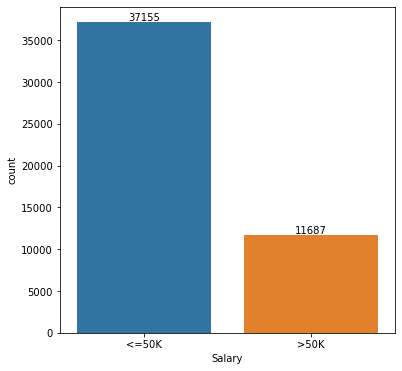

In [40]:
plt.figure(figsize=(6,6))
plot1 = sns.countplot(df['Salary']);
abs_values = df['Salary'].value_counts(ascending=False).values;
plot1.bar_label(container=plot1.containers[0], labels=abs_values);

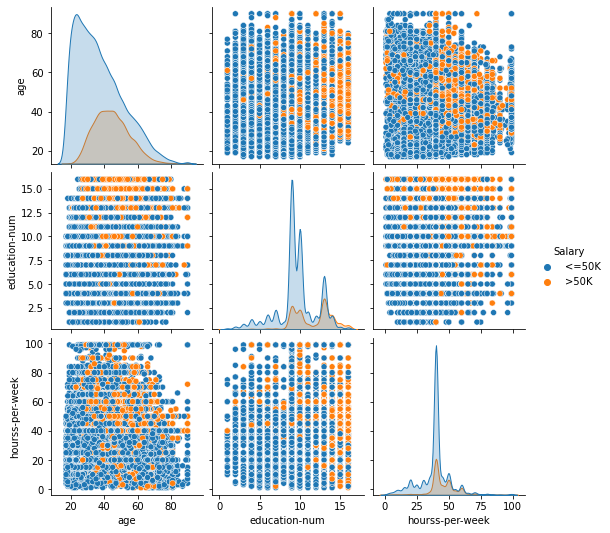

In [14]:
sns.pairplot(df, hue = 'Salary')

In [16]:
df['Salary']=df['Salary'].astype('category')
df['Sal_new']=df['Salary'].cat.codes

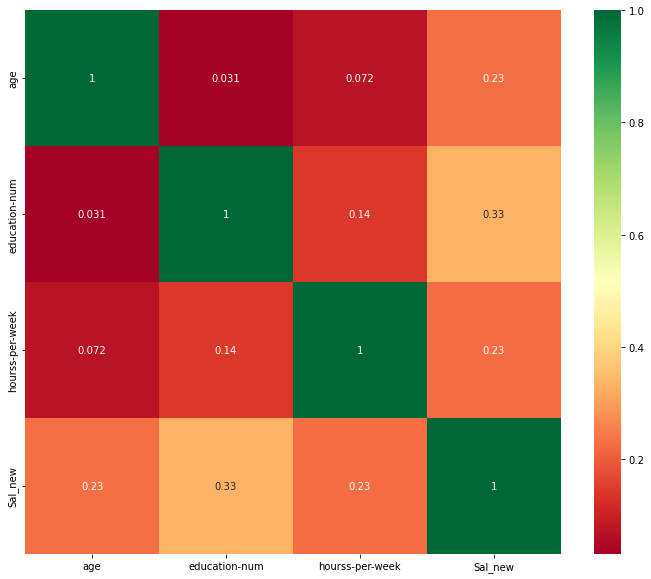

In [17]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [18]:
X = df[["education-num","age"]]
y = df[["Sal_new"]]
y = y.values.ravel()

In [19]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
print(X_test.shape)
print(X_train.shape)

(9769, 2)
(39073, 2)


In [38]:
error_rate = []
for i in range(1,6):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

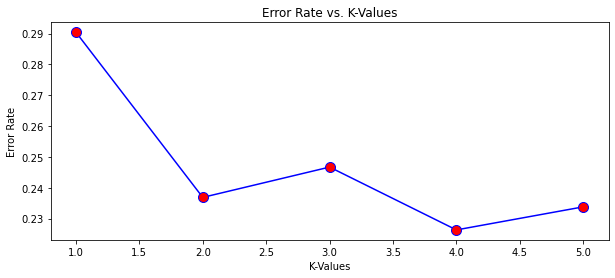

In [39]:
plt.figure(figsize=(10,4))
plt.plot(range(1,6), error_rate, color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [25]:
classifier2 = KNeighborsClassifier(n_neighbors=2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [26]:
z_pred2 = classifier2.predict(X_test)

In [27]:
print(confusion_matrix(y_test, z_pred2))
print(classification_report(y_test, z_pred2))

[[6840  574]
 [1740  615]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      7414
           1       0.52      0.26      0.35      2355

    accuracy                           0.76      9769
   macro avg       0.66      0.59      0.60      9769
weighted avg       0.73      0.76      0.73      9769



In [28]:
classifier3 = KNeighborsClassifier(n_neighbors=3)
classifier3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
z_pred3 = classifier3.predict(X_test)

In [30]:
print(confusion_matrix(y_test, z_pred3))
print(classification_report(y_test, z_pred3))

[[6322 1092]
 [1318 1037]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      7414
           1       0.49      0.44      0.46      2355

    accuracy                           0.75      9769
   macro avg       0.66      0.65      0.65      9769
weighted avg       0.75      0.75      0.75      9769



In [31]:
classifier4 = KNeighborsClassifier(n_neighbors=4)
classifier4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [32]:
z_pred4 = classifier4.predict(X_test)

In [33]:
print(confusion_matrix(y_test, z_pred4))
print(classification_report(y_test, z_pred4))

[[6935  479]
 [1732  623]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      7414
           1       0.57      0.26      0.36      2355

    accuracy                           0.77      9769
   macro avg       0.68      0.60      0.61      9769
weighted avg       0.74      0.77      0.74      9769



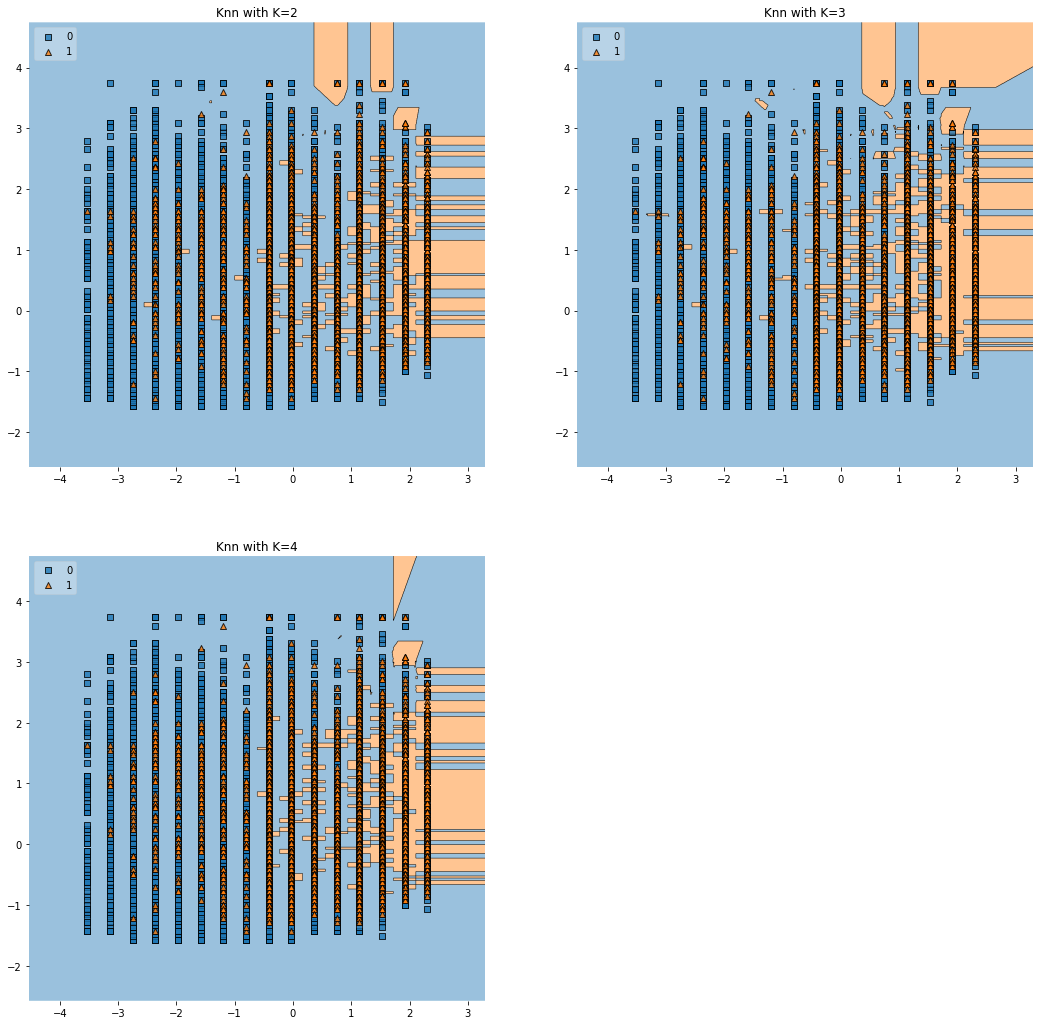

In [34]:
import itertools
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(18,18))

labels = ['Knn with K=2', 'Knn with K=3', 'Knn with K=4']
for clf, lab, grd in zip([classifier2, classifier3, classifier4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()